# EE 595 Assignment 1

* Student: John Rizzo
* Teacher: Shucheng Yu
* Assignment: EE 595 Assignment 1
* Due: 5/26/25

Write a program to estimate the parameters for an unknown polynomial using polyfit() function of the numpy package

## Preamble

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)  # For reproducible results

In [13]:
# Generate x values
noise_scale = 100
number_of_samples = 50

## Generate Noisy Data

In [14]:
x = 30*(np.random.rand(number_of_samples,1)-0.5)
x.shape

(50, 1)

In [15]:
# True polynomial: y = 6*x + 9*x^2 + 2*x^3
y = 6*x + 9*x**2 + 2*x**3 + noise_scale * np.random.randn(number_of_samples, 1)
y.shape

(50, 1)

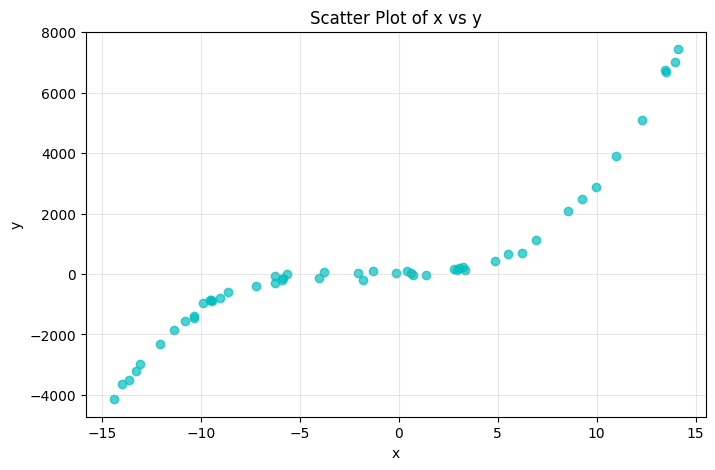

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="c", alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.grid(True, alpha=0.3)
plt.show()

## 1) Please plot the noisy data and the polynomial you found (in the same figure).  You can use any value of m selected from 2, 3, 4, 5, 6.  

Use numpy.polyfit() to estimate the polynomial parameters for polynomial degrees (m = 2, 3, 4, 5, 6) and see how well they fit.

In [17]:
degree = 3 # Best fit from the plot
color = 'c'

# Restructure x and y to 1D arrays
x = x[:,0]
y = y[:,0]

# Use numpy.polyfit to estimate polynomial parameters
coeffs = np.polyfit(x, y, degree)

print(f"Fitted Polynomial Degree {degree}")
print(f"Polynomial Coefficients: {coeffs}")
print(f"True Coefficients:       [ 6, 9, 2 ]")

# Generate y values for the polynomial
poly = np.poly1d(coeffs)
y_fit = poly(x)

# Calculate R-squared for evaluating the fit
ss_res = np.sum((y - y_fit)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")

Fitted Polynomial Degree 3
Polynomial Coefficients: [1.9847421  8.98459635 7.31698758 0.29936906]
True Coefficients:       [ 6, 9, 2 ]
R-squared: 0.9988


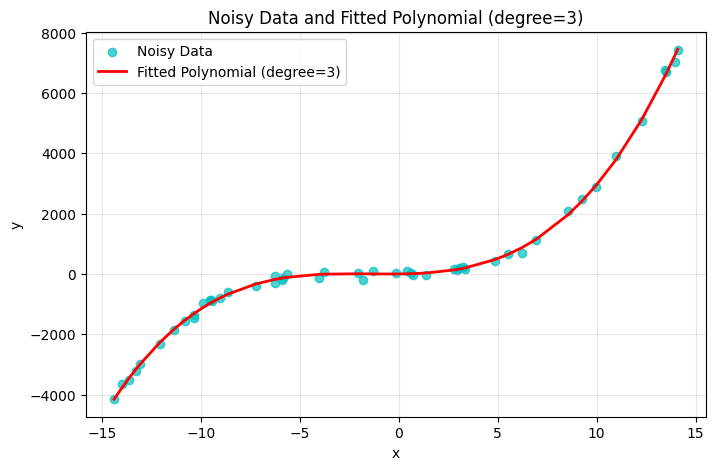

In [18]:
# Scatter plot of noisy data
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='c', alpha=0.7, label='Noisy Data')

# Sort x for smooth polynomial curve
x_sorted = np.sort(x.flatten())
poly_curve = np.poly1d(coeffs)
plt.plot(x_sorted, poly_curve(x_sorted), color='red', linewidth=2, label=f'Fitted Polynomial (degree={degree})')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Noisy Data and Fitted Polynomial (degree={degree})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 2. Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively.  Identify the best choice of m.  Explain why this choice is the best.


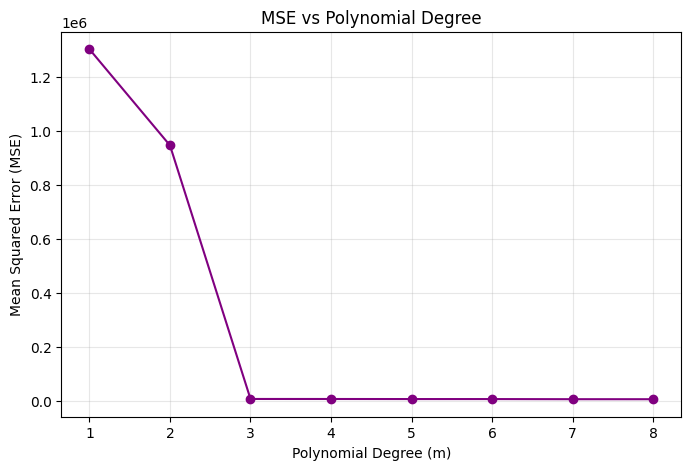

2) A choice of m as 8 results in the lowest MSE: 7232.35. See code comments!


In [19]:
# Compute MSE for polynomial degrees 1 through 8
degrees = range(1, 9)
mses = []

for m in degrees:
    coeffs_m = np.polyfit(x.flatten(), y.flatten(), m)
    poly_m = np.poly1d(coeffs_m)
    y_pred = poly_m(x)
    mse = np.mean((y.flatten() - y_pred.flatten())**2)
    mses.append(mse)

# Plot MSE vs degree
plt.figure(figsize=(8, 5))
plt.plot(degrees, mses, 'o-', color='purple')
plt.xlabel('Polynomial Degree (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Polynomial Degree')
plt.grid(True, alpha=0.3)
plt.show()

# Identify the best degree (minimum MSE)
best_degree = degrees[np.argmin(mses)]
print(f"2) A choice of m as {best_degree} results in the lowest MSE: {min(mses):.2f}. See code comments!")

# This choice balances model complexity and fit to noisy data, avoiding both
# underfitting and overfitting. While technically degree 8 has the lowest MSE
# 3 and beyond are good since the polynomial is of degree 3and the choices 
# 4-8 add little additional information and could overfit the data.

## 3) Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm and plot the polynomials with the m found in 2).  Discuss the impact of noise scale to the accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of noise_scale.]

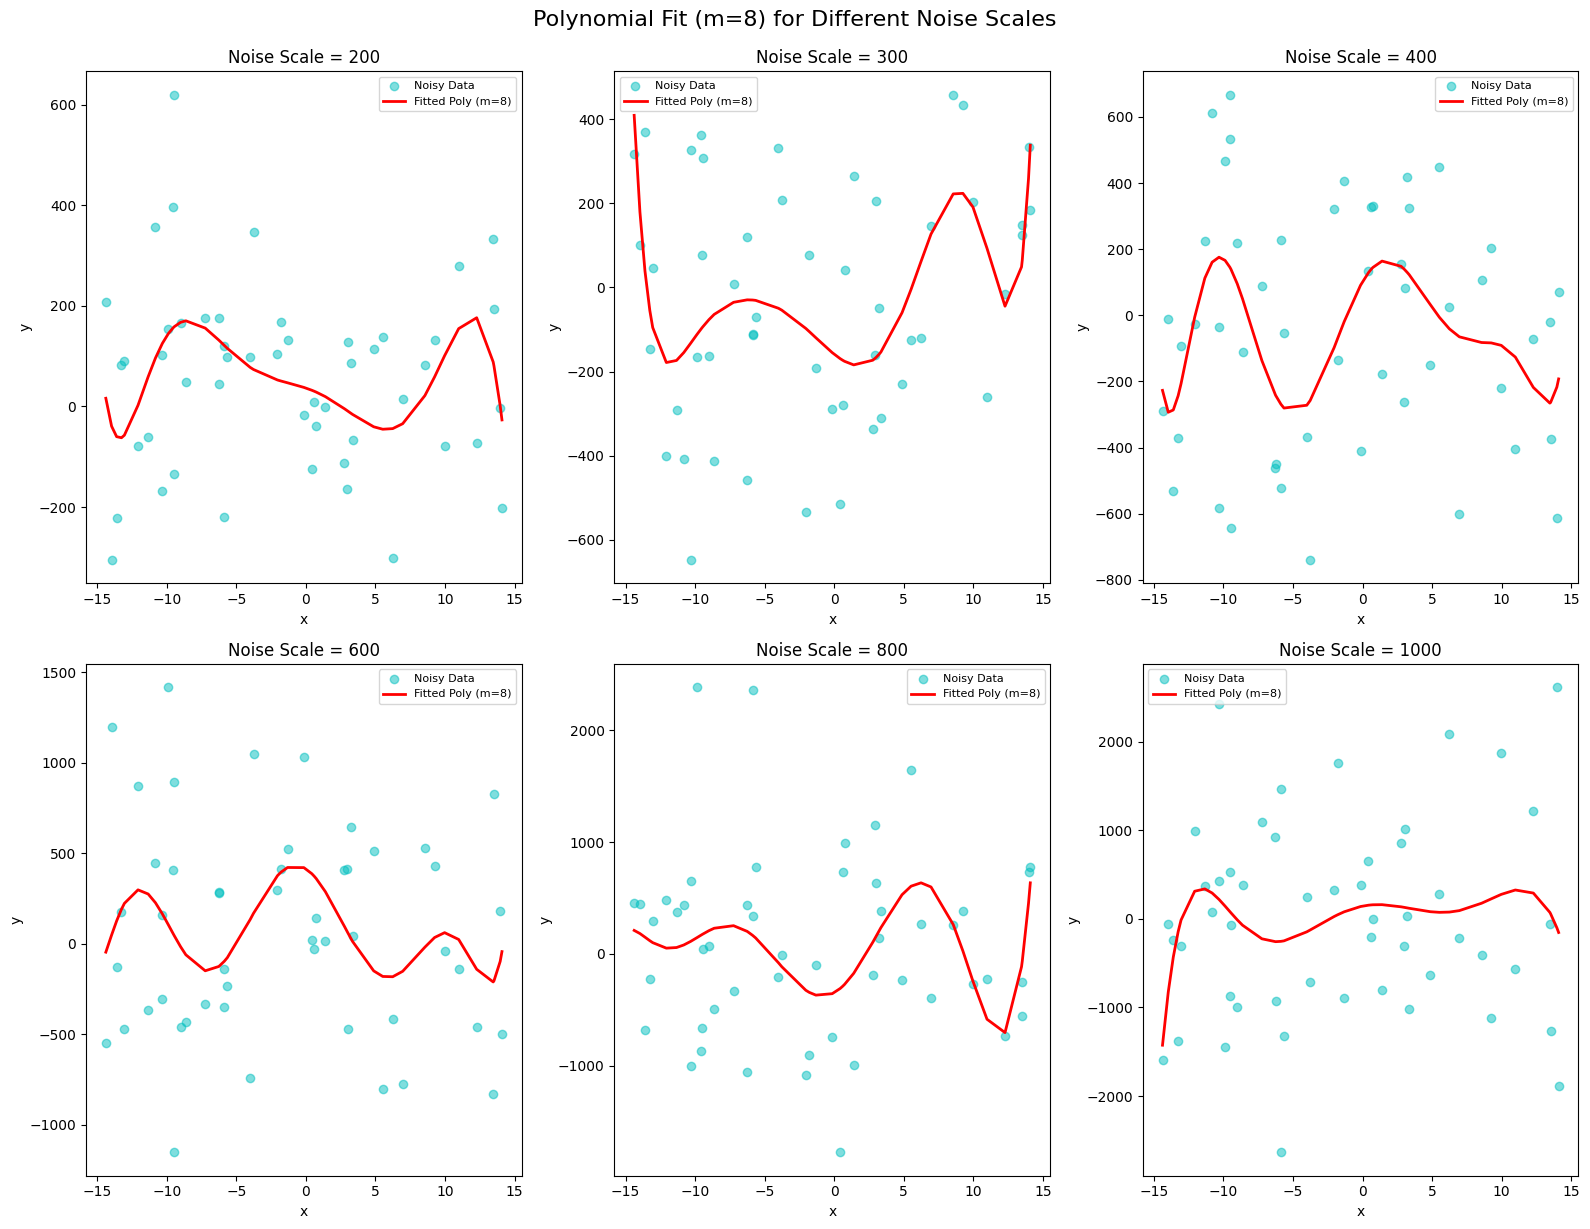

In [29]:
# Use degree m=8 as found in problem 2
m = 8
noise_scales = [200, 300, 400, 600, 800, 1000]

plt.figure(figsize=(16, 12))

# Generate true y values (without noise) for reference
y_true = 6*x + 9*x**2 + 2*x**3

for idx, ns in enumerate(noise_scales, 1):
    # Generate new noisy data for each noise_scale
    y_noisy = (y_true + ns * np.random.randn(number_of_samples, 1))[:,0]
    y_noisy_flat = y_noisy

    # Fit polynomial of degree m=8
    coeffs_m = np.polyfit(x, y_noisy_flat, m)
    poly_m = np.poly1d(coeffs_m)
    y_fit = poly_m(x)
    
    # # Plot
    plt.subplot(2, 3, idx)
    plt.scatter(x, y_noisy_flat, color='c', alpha=0.5, label='Noisy Data')
    plt.plot(np.sort(x), poly_m(np.sort(x)), color='red', linewidth=2, label=f'Fitted Poly (m={m})')
    # plt.plot(np.sort(x), np.poly1d([2, 9, 6, 0, 0, 0, 0, 0, 0])(np.sort(x)), 'k--', label='True Poly (deg=3)')
    plt.title(f"Noise Scale = {ns}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize=8)
    plt.tight_layout()

plt.suptitle("Polynomial Fit (m=8) for Different Noise Scales", fontsize=16, y=1.02)
plt.show()

As noise_scale increases, the fit becomes less accurate (higher MSE), and the estimated parameters deviate more from the true polynomial. High noise can lead to overfitting or poor generalization, making the fitted curve less reliable.

## 4) Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the m found in 2).  Discuss the impact of the number of samples to the accuracy of the returned parameters.  You need to plot a figure like in 1) for EACH choice of number_of_samples.

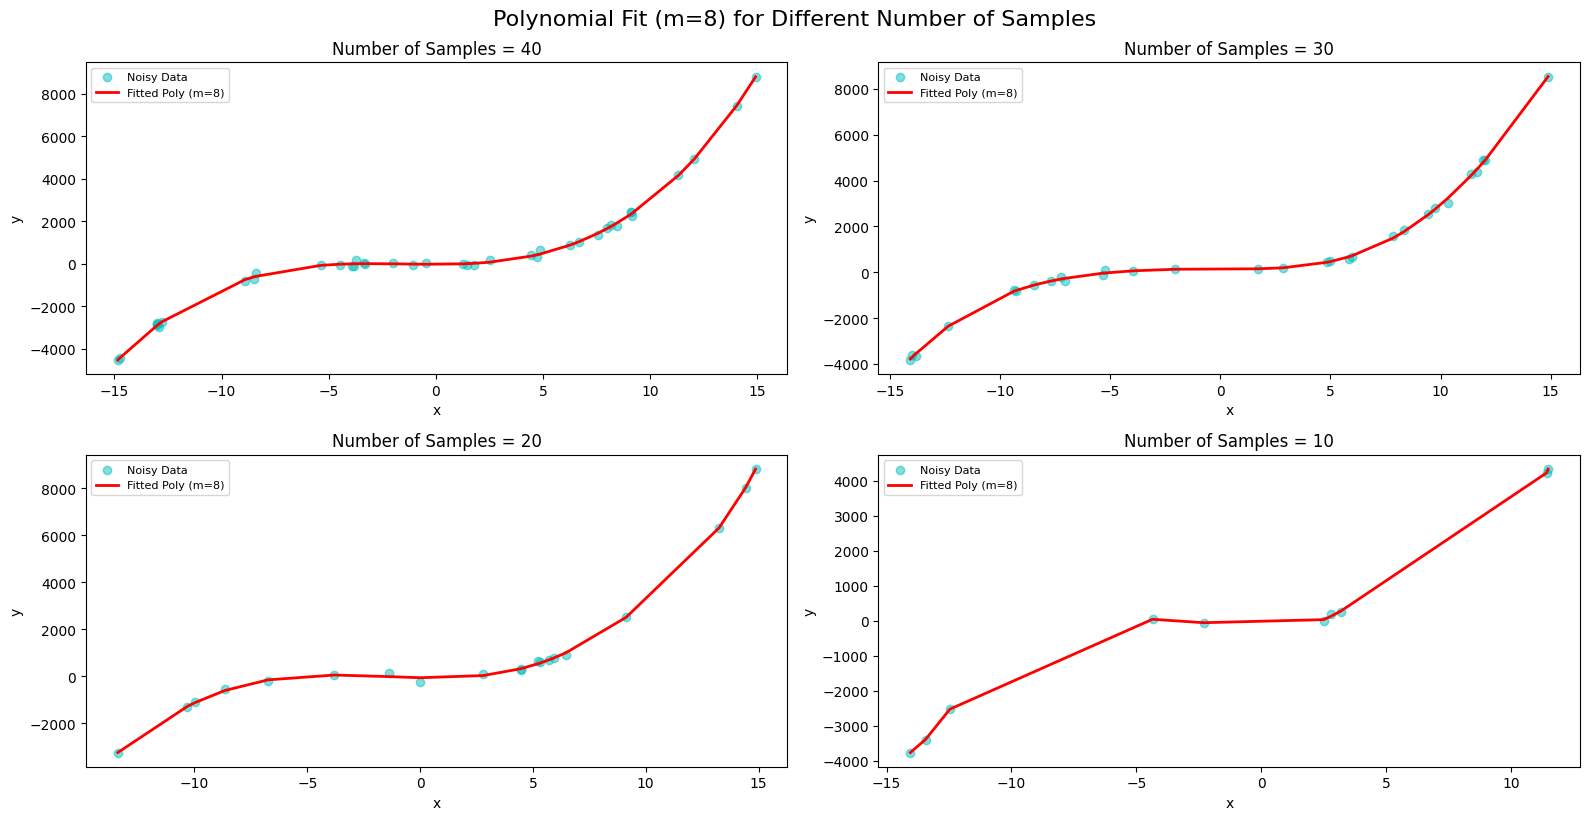

In [30]:
# Use degree m=8 as found in problem 2
m = 8
sample_sizes = [40, 30, 20, 10]
noise_scale = 100  # Use the original noise scale for fair comparison

plt.figure(figsize=(16, 8))

for idx, n_samples in enumerate(sample_sizes, 1):
    # Generate new x and y for each sample size
    x_new = 30 * (np.random.rand(n_samples, 1) - 0.5)
    y_true_new = 6 * x_new + 9 * x_new**2 + 2 * x_new**3
    y_noisy_new = (y_true_new + noise_scale * np.random.randn(n_samples, 1))[:, 0]
    x_flat = x_new[:, 0]

    # Fit polynomial of degree m=8
    coeffs_m = np.polyfit(x_flat, y_noisy_new, m)
    poly_m = np.poly1d(coeffs_m)

    # Plot
    plt.subplot(2, 2, idx)
    plt.scatter(x_flat, y_noisy_new, color='c', alpha=0.5, label='Noisy Data')
    plt.plot(np.sort(x_flat), poly_m(np.sort(x_flat)), color='red', linewidth=2, label=f'Fitted Poly (m={m})')
    plt.title(f"Number of Samples = {n_samples}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(fontsize=8)
    plt.tight_layout()

plt.suptitle("Polynomial Fit (m=8) for Different Number of Samples", fontsize=16, y=1.02)
plt.show()

With more samples the polynomial fits the data more smoothly, while with less data the polynomial is fittedted to the noise. The number of samples impacts the accuracy of the returned parameters, with more samples leading to a more accurate fit and less noise in the estimated parameters.